In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [130]:
veri=pd.read_csv(("Catalogue.csv"), engine='python',sep=',',error_bad_lines=False)

In [131]:
veri.shape

(5596, 15)

In [132]:
veri.head()

,No,Zaman (UTC),Ref1,Kaynak Aç?klama 1,Enlem,Boylam,Derinlik,Sabit Derinlik,Kaynak No 2,Kaynak Aç?klama 2,Tip,Büyüklük,Kaynak No 3,Kaynak Aç?klama 3,Yer
0,0,2020-11-09 20:30:59,0,,37.8720,26.9730,6.98,-,7,AFAD-DDA,Mw,4.2,7,AFAD-DDA,-
1,0,2020-11-08 09:22:54,0,,39.3793,40.7516,9.15,-,7,AFAD-DDA,ML,4.2,7,AFAD-DDA,-
2,0,2020-11-04 02:24:17,0,,37.7753,27.0506,7.98,-,7,AFAD-DDA,Mw,4.0,7,AFAD-DDA,-
3,0,2020-11-03 20:35:37,0,,37.9090,26.4931,16.05,-,7,AFAD-DDA,Mw,4.1,7,AFAD-DDA,-
4,0,2020-11-02 19:16:40,0,,37.9133,26.5003,6.85,-,7,AFAD-DDA,Mw,4.2,7,AFAD-DDA,-


In [133]:
veri.drop(['Ref1','No', 'Zaman (UTC)','Kaynak Aç?klama 1','No','Sabit Derinlik','Kaynak No 2', 'Kaynak Aç?klama 2','Tip','Kaynak No 3','Kaynak Aç?klama 3','Yer'], axis = 1, inplace = True)

In [134]:
veri.shape

(5596, 4)

In [135]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5596 entries, 0 to 5595
Data columns (total 4 columns):
Enlem       5596 non-null float64
Boylam      5596 non-null float64
Derinlik    5596 non-null float64
Büyüklük    5596 non-null float64
dtypes: float64(4)
memory usage: 175.0 KB


In [136]:
data_depth = veri["Derinlik"]  

In [137]:
data_depth.head()

0     6.98
1     9.15
2     7.98
3    16.05
4     6.85
Name: Derinlik, dtype: float64

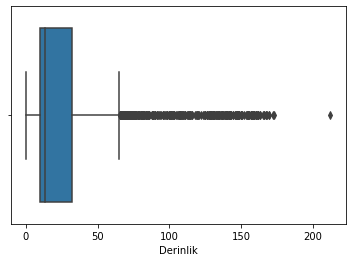

In [138]:
sns.boxplot(x = data_depth); 

In [139]:
len(data_depth)

5596

In [140]:
Q1 = data_depth.quantile(0.25)
Q3 = data_depth.quantile(0.75)
IQR = Q3 - Q1

In [141]:
alt_sinir = Q1 - 1.5*IQR

In [142]:
ust_sinir = Q3 + 1.5*IQR

In [143]:
ust_sinir

65.0

In [144]:
aykiri_tf = (data_depth  > ust_sinir)

In [145]:
data_depth[aykiri_tf].index

Int64Index([ 211,  278,  299,  352,  385,  504,  559,  603,  611,  669,
            ...
            5467, 5468, 5472, 5474, 5502, 5516, 5534, 5554, 5576, 5591],
           dtype='int64', length=373)

In [146]:
data_depth.head(212)

0       6.98
1       9.15
2       7.98
3      16.05
4       6.85
       ...  
207     7.02
208     9.41
209    21.70
210    13.86
211    65.60
Name: Derinlik, Length: 212, dtype: float64

In [147]:
data_depth[aykiri_tf] = ust_sinir

In [148]:
data_depth[aykiri_tf]

211     65.0
278     65.0
299     65.0
352     65.0
385     65.0
        ... 
5516    65.0
5534    65.0
5554    65.0
5576    65.0
5591    65.0
Name: Derinlik, Length: 373, dtype: float64

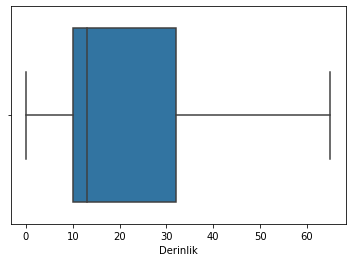

In [149]:
sns.boxplot(x = data_depth);

In [150]:
data_enlem = veri["Enlem"]  

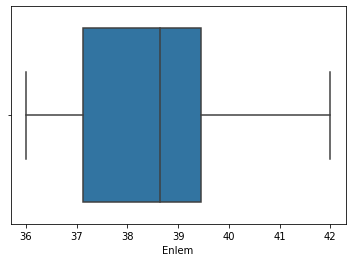

In [151]:
sns.boxplot(x = data_enlem); 

In [152]:
data_boylam = veri["Boylam"]  

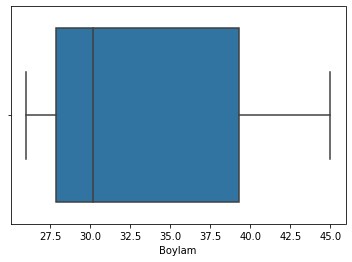

In [153]:
sns.boxplot(x = data_boylam); 

In [154]:
veri.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Enlem,5596.0,38.485881,1.483263,36.0,37.127675,38.6383,39.44255,42.0000
Boylam,5596.0,33.157266,6.244439,26.0,27.865500,30.1585,39.29400,44.9943
Derinlik,5596.0,21.322813,17.867104,0.0,10.000000,13.0000,32.00000,65.0000
Büyüklük,5596.0,4.394282,0.418824,4.0,4.100000,4.3000,4.60000,7.6000


In [155]:
import numpy as np #use numpy for y variable for Linear Regression
y=np.array(veri['Büyüklük'])

In [156]:
X=np.array(veri.drop('Büyüklük',axis=1))

In [189]:
from sklearn.model_selection import train_test_split  #lets split data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [190]:
linear=LinearRegression()

In [191]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.05052439314457624


In [193]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.03428226851825522


In [194]:
predict_data=np.array([[37.8720,26.9730,6.98]])   #kocaeli earthquake prediction is 4.05, quiet close to the real value
data2=linear.predict(predict_data)
print(data2)

[4.30914889]


In [195]:
veri.head()

,Enlem,Boylam,Derinlik,Büyüklük
0,37.8720,26.9730,6.98,4.2
1,39.3793,40.7516,9.15,4.2
2,37.7753,27.0506,7.98,4.0
3,37.9090,26.4931,16.05,4.1
4,37.9133,26.5003,6.85,4.2
